##### R2

In [1]:
y = [2,4,5,4,5]
y_hat = [2.8, 3.4, 4, 4.6, 5.2]

In [2]:
from sklearn.metrics import r2_score

In [3]:
r2_score(y, y_hat)

0.6000000000000001

In [7]:
import numpy as np

In [8]:
y = np.array(y)
y_hat = np.array(y_hat)

In [17]:
1 - (sum((y-y_hat)**2) / sum( (y - np.mean(y))**2 ))

0.6000000000000001

In [15]:
sum( (y - np.mean(y))**2 )

6.0

In [19]:
(sum((y_hat-np.mean(y))**2) / sum( (y - np.mean(y))**2 ))

0.6000000000000001

<b>r2 score always increases when the number of coefficients increase.</b> and the squared sum of residuals i.e. (y_hat - y_i)**2 decreases. 
This causes the nominator to be a smaller number. And a smaller denominator divided by a number (let's assume constant) results in a much smaller number. Subtracting this smaller number from 1 results in higher value, hence higher r2 value.


#### Adjusted r2

The adjusted r2 score is introduced to solve the issue of higher r2 score for increasing number of features. Becasue r2 doesn't account for the number of features used to predict and hence gives higher value showing the good fit of the model. But here is the issue, it is not accounting the number of attributes & samples used to predict that outcome.

The formula of Adjusted r2 is;

r2_adjusted = 1 - ( (1-r2)(N-1)/(N-P-1)  )

r2 = r2 score
P = number of independent features
N = number of samples in DS (training only I guess!)

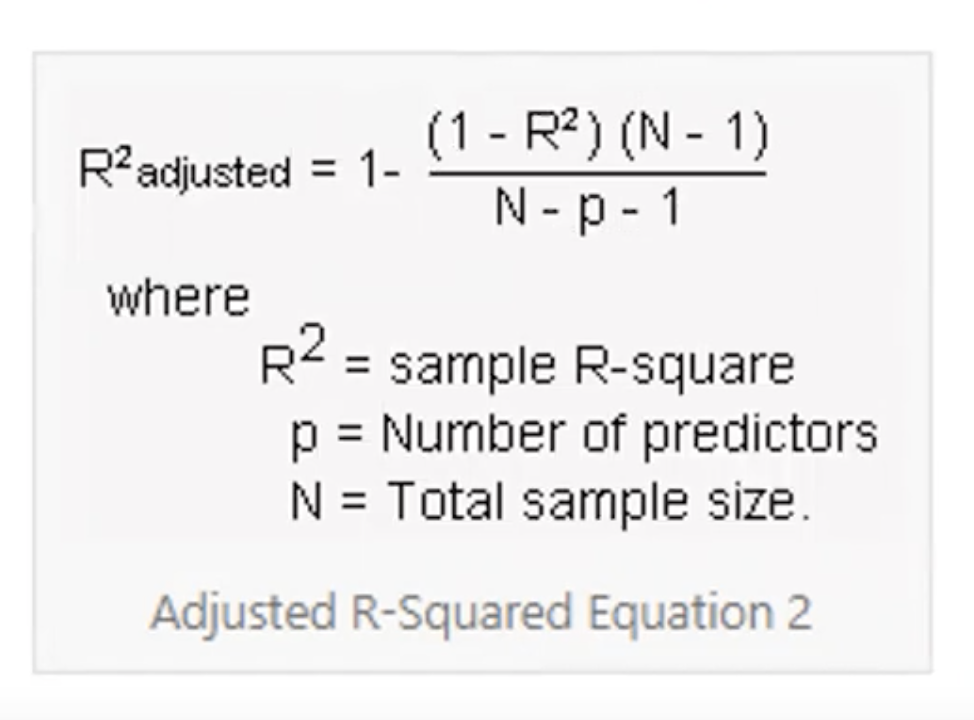

#### How Adjusted r2 helps in fixing the issue of r2 & increasing number of parameters?

<b>When the features are correlated</b>, the r2 score is high. Hence, the equation portion (1-r2) becomes very small & the multiplication of rest of the equation i.e. (N-1)/N-P-1 when multiplied with the smaller (1-r2) so the result is also a small fraction. Subtracting this small fraction from 1 results in bigger r2 adjusted. 

Hence there is a slight difference between r2 and r2_adjusted in this case.

<b>When the features are not correlated</b>, the r2 score is still a moderate / little higher number because of the number of increased p(no. of features) & having so many coefficient values with parameter cause the r2 to be moderate. But the "P" subtraction in the denominator causes the portion to be a bigger number. And when this is subtracted from 1, it's a small r2_adjusted value. 

Hence there is a huge difference between r2 & r2 Adjusted.


In all cases, r2_adjusted will always be less than or equal to r2_adjusted value.


<b> Considering the above thing in mind, r2_adjusted will not be a good metric to evaluate the K Neighbour Regressor.

In [21]:
# Calculating r2_adjusted for above calculation:
R2 = r2_score(y, y_hat)

In [22]:
y

array([2, 4, 5, 4, 5])

In [28]:
N = len(y)
P = 1 # number of independent features (let's say 1 for now)

R2_Adjusted = 1 - (1-R2)*(N-1)/(N-P-1)

In [29]:
R2_Adjusted

0.4666666666666668

In [25]:
R2

0.6000000000000001

In [58]:
N = 100000000000000000000000000
P = 1 # number of independent features (let's say 1 for now)

R2_Adjusted = 1 - (1-R2)*(N-1)/(N-P-1)

In [59]:
R2_Adjusted

0.6000000000000001

In [66]:
N = 5
P = 1 # number of independent features (let's say 1 for now)

R2_Adjusted = 1 - (1-R2)*(N-1)/(N-P-1)

In [67]:
R2_Adjusted

0.4666666666666668

In [69]:
N = 5
P = 2  # number of independent features (let's say 1 for now)

R2_Adjusted = 1 - (1-R2)*(N-1)/(N-P-1)
R2_Adjusted

0.20000000000000018

In [72]:
N = 5
P = 3  # number of independent features (let's say 1 for now)

R2_Adjusted = 1 - (1-R2)*(N-1)/(N-P-1)
R2_Adjusted

-0.5999999999999996

Increase in N cause the R2_adjusted to be increased (holding rest constant).


Incease in P (nummber of independent Features) cause the R2_adjusted to decrease abruptly.

R2_adjusted is not a good fit for K Neighbours Regressor, becasue the increasing number of dimensions (independent features) causes the R2_adjusted to decrease.

Also, another reason could be that the K Neighbour Coefficient is not a coefficient dependent model. i.e. It doesn't assigns slope to feature columns and hence the r2 will not increase by the increase in the coefficients (number of dependent features)